# Ejemplos de aplicación del Algoritmo Alpha

Este notebook demuestra la aplicación del algoritmo Alpha a diferentes logs de eventos.

In [7]:
# Importar la clase Alpha desde el módulo
from alpha import Alpha

# Importar bibliotecas necesarias para visualización
visualization_available = True
try:
    import networkx as nx
    import matplotlib.pyplot as plt
except ImportError:
    visualization_available = False
    print("NOTA: Las bibliotecas NetworkX y/o Matplotlib no están instaladas.")
    print("Instale con 'pip install networkx matplotlib' para ver gráficos.")

# Función auxiliar para ejecutar el algoritmo Alpha en un log y mostrar resultados clave
def ejecutar_alpha(nombre_log, log):
    print(f"\n=== ANÁLISIS DEL LOG {nombre_log} ===\n")
    print(f"Log: {log}")
    
    # Crear instancia y procesar
    alpha = Alpha()
    try:
        alpha.parse_event_log(log).discover_relations().execute_alpha_algorithm()
        
        # Mostrar resultados clave
        print(f"\nActividades: {alpha.activity_set}")
        print(f"Tareas iniciales: {alpha.entry_tasks}")
        print(f"Tareas finales: {alpha.exit_tasks}")
        
        # Mostrar matriz de huella
        print("\nMatriz de huella:")
        print(alpha.create_footprint_matrix())
        
        # Mostrar lugares
        print("\nLugares identificados:")
        for idx, lugar in enumerate(alpha.places):
            entradas = ", ".join(sorted(lugar[0]))
            salidas = ", ".join(sorted(lugar[1]))
            print(f"p{idx}: {{{entradas}}} → {{{salidas}}}")
        
        # Visualizar utilizando NetworkX si está disponible
        if visualization_available:
            print("\nVisualización de la Red de Petri:")
            petri_plot = alpha.visualize_petri_net()
            if petri_plot:
                petri_plot.tight_layout()
                display(petri_plot.figure)
                plt.close()
            
            # print("\nVisualización de los lugares:")
            # places_plot = alpha.visualize_places()
            # if places_plot:
            #     places_plot.tight_layout()
            #     display(places_plot.figure)
            #     plt.close()
        
        print("\nEjecutado correctamente")
    except Exception as e:
        print(f"\nError al procesar: {e}")
        import traceback
        traceback.print_exc()
    
    print("\n" + "-"*50)

## Logs de eventos de ejemplo

In [8]:
print("Ejemplos de logs de eventos:")
print("L1: <a,b,c,d>,<a,c,b,d>,<a,e,d>")
print("L2: <a,b,c,d,f>,<a,c,b,d,e>,<a,c,b,d,f>,<a,b,c,d,e>")
print("L3: <a,b,d>,<a,c,d>")
print("L4: <a,b,d>,<a,c,e>,<a,b,e>")
print("L5: <a,c,b>,<a,b,a>,<c,b,a>")
print("L6: <a,f,e,d,b>,<f,a,e,d,b>,<a,f,e,c,b>,<a,f,e,b,d>,<a,f,e,b,c>,<f,a,e,c,b>")
print("L7: <A,B,C,D,E,F,B,D,C,E,G>,<A,B,D,C,E,G>,<A,B,C,D,E,F,B,C,D,E,F,B,D,C,E,G>")
print("L8: <a,b,c,d>,<a,c,b,d>,<a,b,c,e,f,c,b,d>,<a,b,c,e,f,b,c,d>,<a,c,b,e,f,b,c,d>,<a,c,b,e,f,b,c,e,f,c,b,d>")
print("L9: <a,b,e,f>,<a,b,e,c,d,b,f>,<a,b,c,e,d,b,f>,<a,b,c,d,e,b,f>,<a,e,b,c,d,b,f>")

Ejemplos de logs de eventos:
L1: <a,b,c,d>,<a,c,b,d>,<a,e,d>
L2: <a,b,c,d,f>,<a,c,b,d,e>,<a,c,b,d,f>,<a,b,c,d,e>
L3: <a,b,d>,<a,c,d>
L4: <a,b,d>,<a,c,e>,<a,b,e>
L5: <a,c,b>,<a,b,a>,<c,b,a>
L6: <a,f,e,d,b>,<f,a,e,d,b>,<a,f,e,c,b>,<a,f,e,b,d>,<a,f,e,b,c>,<f,a,e,c,b>
L7: <A,B,C,D,E,F,B,D,C,E,G>,<A,B,D,C,E,G>,<A,B,C,D,E,F,B,C,D,E,F,B,D,C,E,G>
L8: <a,b,c,d>,<a,c,b,d>,<a,b,c,e,f,c,b,d>,<a,b,c,e,f,b,c,d>,<a,c,b,e,f,b,c,d>,<a,c,b,e,f,b,c,e,f,c,b,d>
L9: <a,b,e,f>,<a,b,e,c,d,b,f>,<a,b,c,e,d,b,f>,<a,b,c,d,e,b,f>,<a,e,b,c,d,b,f>


## Análisis del Log 1
Este es uno de los ejemplos más básicos: una elección entre un flujo paralelo (b||c) y un camino simple (e).


=== ANÁLISIS DEL LOG L1 ===

Log: [<a,b,c,d>,<a,c,b,d>,<a,e,d>]

Actividades: ['a', 'b', 'c', 'd', 'e']
Tareas iniciales: ['a']
Tareas finales: ['d']

Matriz de huella:
    a   b   c   d   e
a   #  ->  ->   #  ->
b  <-   #  ||  ->   #
c  <-  ||   #  ->   #
d   #  <-  <-   #  <-
e  <-   #   #  ->   #

Lugares identificados:
p0: {a} → {b, e}
p1: {a} → {c, e}
p2: {b, e} → {d}
p3: {c, e} → {d}
p4: {Il} → {a}
p5: {d} → {Ol}

Visualización de la Red de Petri:


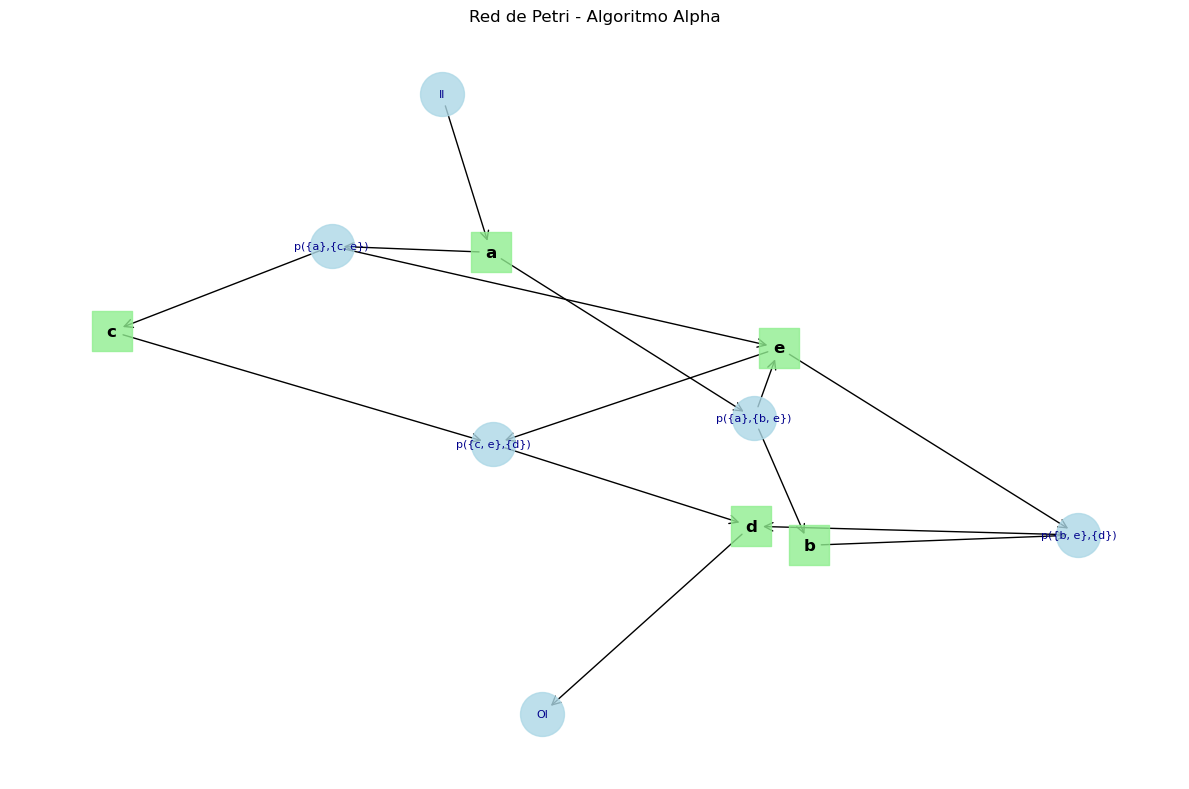


Ejecutado correctamente

--------------------------------------------------


In [9]:
log1 = "[<a,b,c,d>,<a,c,b,d>,<a,e,d>]"
ejecutar_alpha("L1", log1)

## Análisis del Log 2
Este log muestra una elección entre dos salidas finales (e/f) después de un flujo paralelo.


=== ANÁLISIS DEL LOG L2 ===

Log: [<a,b,c,d,f>,<a,c,b,d,e>,<a,c,b,d,f>,<a,b,c,d,e>]

Actividades: ['a', 'b', 'c', 'd', 'e', 'f']
Tareas iniciales: ['a']
Tareas finales: ['e', 'f']

Matriz de huella:
    a   b   c   d   e   f
a   #  ->  ->   #   #   #
b  <-   #  ||  ->   #   #
c  <-  ||   #  ->   #   #
d   #  <-  <-   #  ->  ->
e   #   #   #  <-   #   #
f   #   #   #  <-   #   #

Lugares identificados:
p0: {a} → {b, c}
p1: {d} → {e, f}
p2: {b, c} → {d}
p3: {Il} → {a}
p4: {e, f} → {Ol}

Visualización de la Red de Petri:


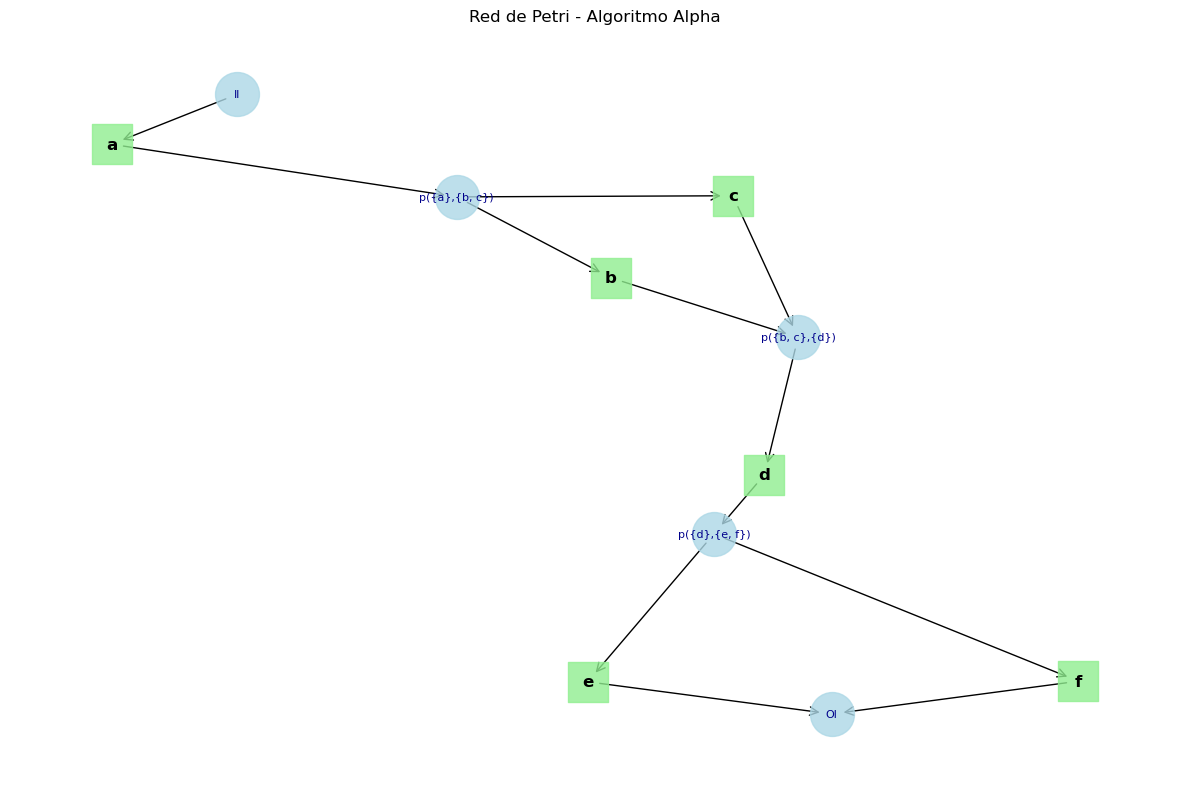


Ejecutado correctamente

--------------------------------------------------


In [10]:
log2 = "[<a,b,c,d,f>,<a,c,b,d,e>,<a,c,b,d,f>,<a,b,c,d,e>]"
ejecutar_alpha("L2", log2)

## Análisis del Log 3
Muestra una elección sencilla (XOR) entre b y c.


=== ANÁLISIS DEL LOG L3 ===

Log: [<a,b,d>,<a,c,d>]

Actividades: ['a', 'b', 'c', 'd']
Tareas iniciales: ['a']
Tareas finales: ['d']

Matriz de huella:
    a   b   c   d
a   #  ->  ->   #
b  <-   #   #  ->
c  <-   #   #  ->
d   #  <-  <-   #

Lugares identificados:
p0: {a} → {b, c}
p1: {b, c} → {d}
p2: {Il} → {a}
p3: {d} → {Ol}

Visualización de la Red de Petri:


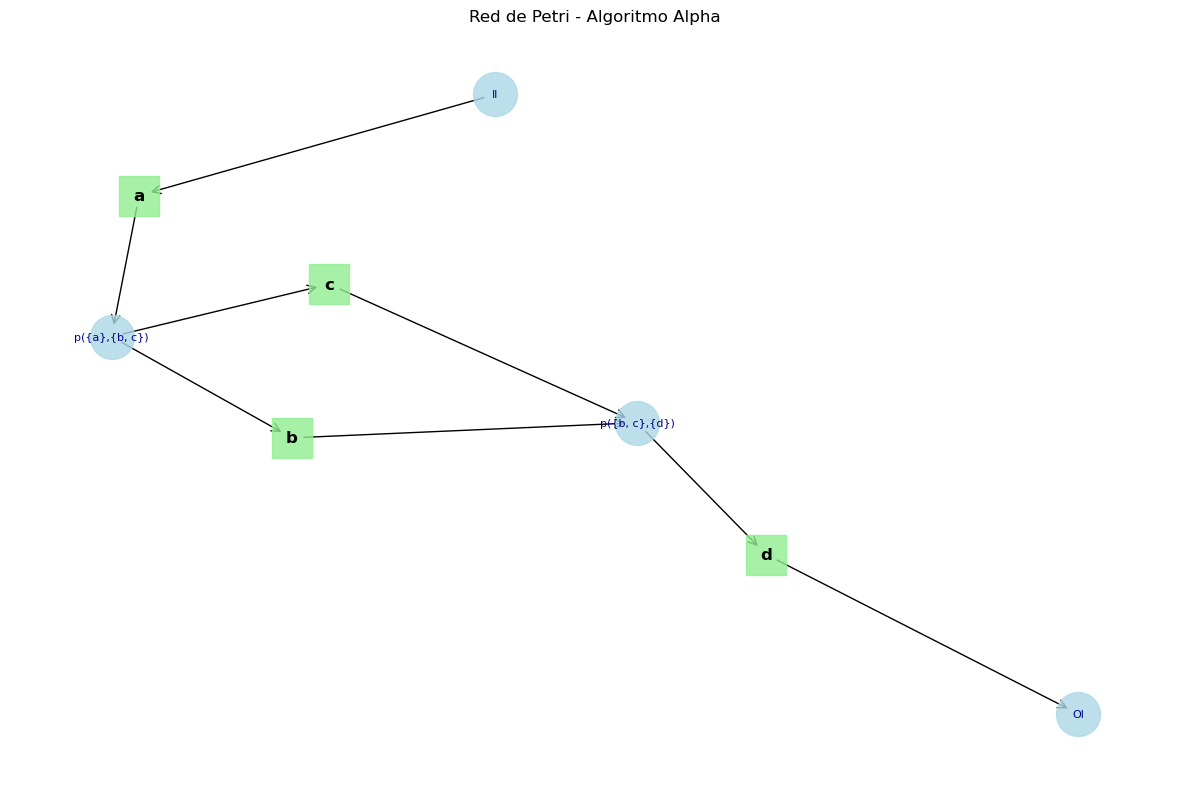


Ejecutado correctamente

--------------------------------------------------


In [11]:
log3 = "[<a,b,d>,<a,c,d>]"
ejecutar_alpha("L3", log3)

## Análisis del Log 4
Este log tiene una estructura que puede ser compleja para el algoritmo Alpha, con rutas que llevan a diferentes finales.


=== ANÁLISIS DEL LOG L4 ===

Log: [<a,b,d>,<a,c,e>,<a,b,e>]

Actividades: ['a', 'b', 'c', 'd', 'e']
Tareas iniciales: ['a']
Tareas finales: ['d', 'e']

Matriz de huella:
    a   b   c   d   e
a   #  ->  ->   #   #
b  <-   #   #  ->  ->
c  <-   #   #   #  ->
d   #  <-   #   #   #
e   #  <-  <-   #   #

Lugares identificados:
p0: {a} → {b, c}
p1: {b} → {d, e}
p2: {b, c} → {e}
p3: {Il} → {a}
p4: {d, e} → {Ol}

Visualización de la Red de Petri:


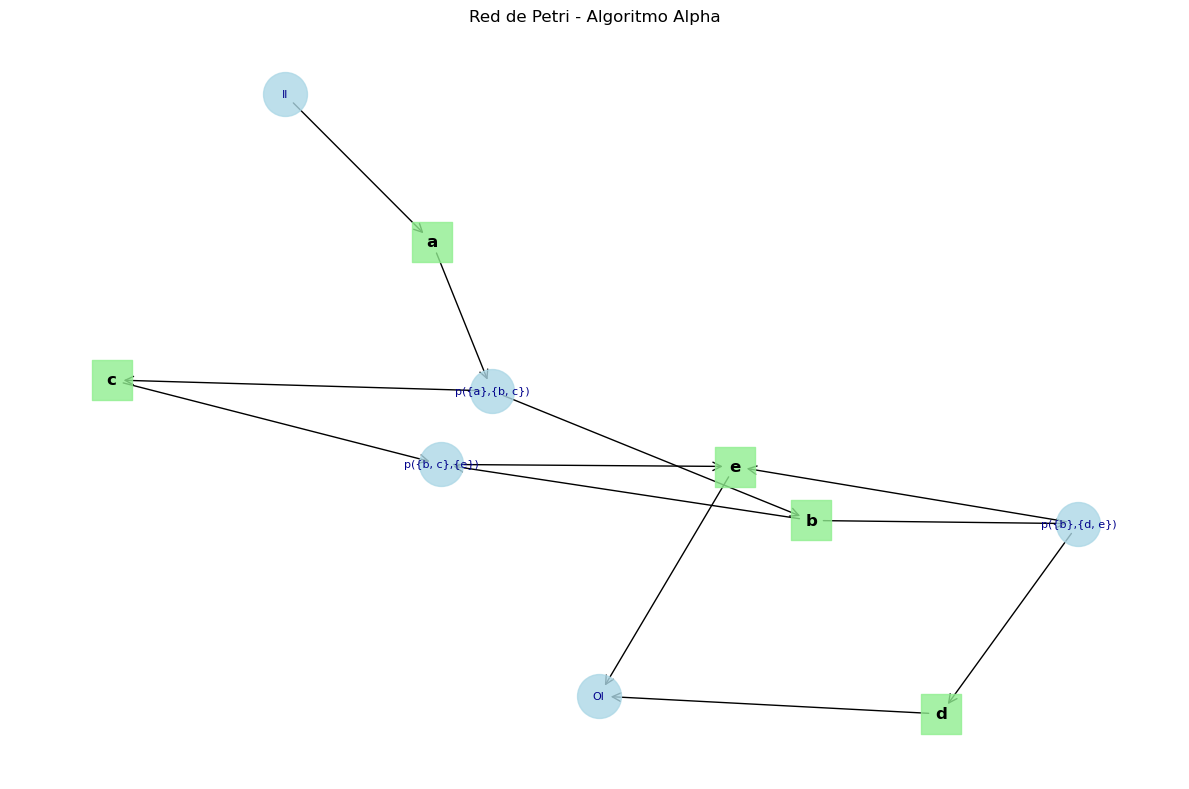


Ejecutado correctamente

--------------------------------------------------


In [12]:
log4 = "[<a,b,d>,<a,c,e>,<a,b,e>]"
ejecutar_alpha("L4", log4)

## Análisis del Log 5
Este log contiene un bucle (a→b→a), lo cual es un desafío para el algoritmo Alpha estándar.


=== ANÁLISIS DEL LOG L5 ===

Log: <a,c,b>,<a,b,a>,<c,b,a>

Actividades: ['a', 'b', 'c']
Tareas iniciales: ['a']
Tareas finales: ['b']

Matriz de huella:
    a   b   c
a   #  ||  ->
b  ||   #  <-
c  <-  ->   #

Lugares identificados:
p0: {c} → {b}
p1: {a} → {c}
p2: {Il} → {a}
p3: {b} → {Ol}

Visualización de la Red de Petri:


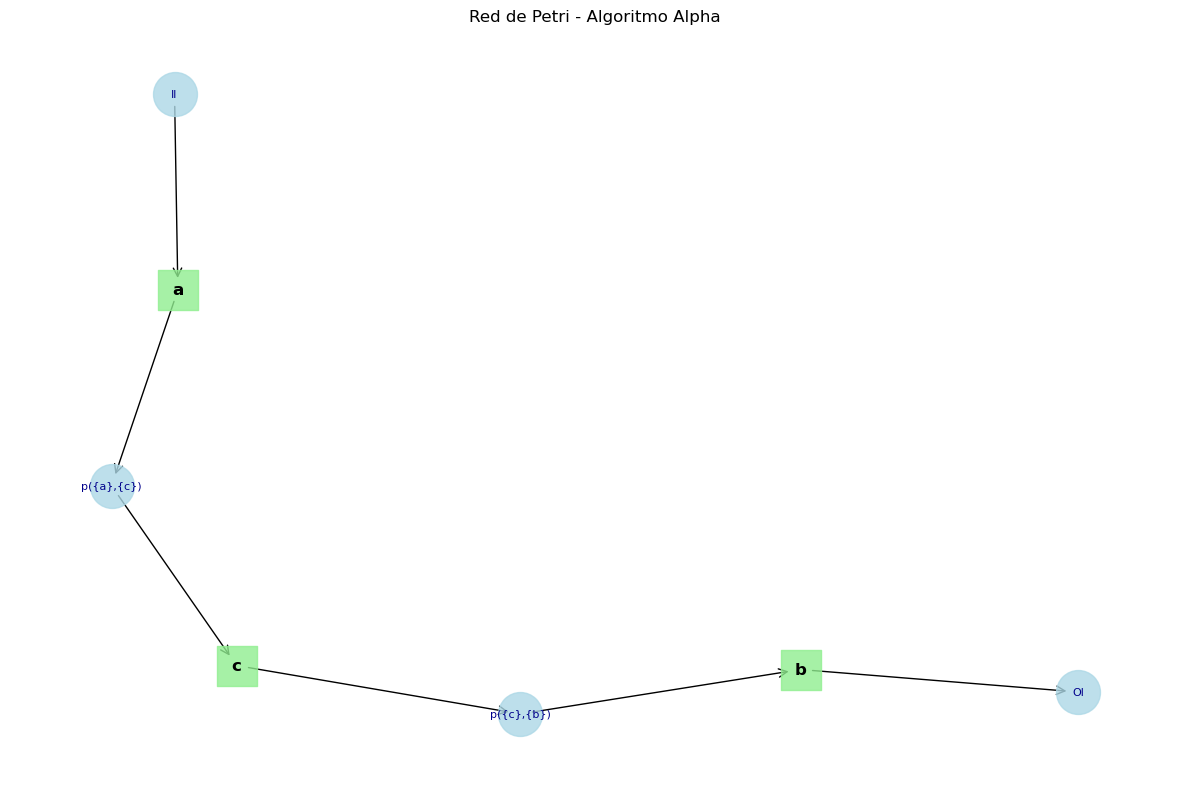


Ejecutado correctamente

--------------------------------------------------


In [13]:
log5 = "<a,c,b>,<a,b,a>,<c,b,a>"
ejecutar_alpha("L5", log5)

## Análisis del Log 6
Este log tiene múltiples rutas paralelas y elecciones.


=== ANÁLISIS DEL LOG L6 ===

Log: [<a,f,e,d,b>,<f,a,e,d,b>,<a,f,e,c,b>,<a,f,e,b,d>,<a,f,e,b,c>,<f,a,e,c,b>]

Actividades: ['a', 'b', 'c', 'd', 'e', 'f']
Tareas iniciales: ['a', 'f']
Tareas finales: ['b', 'c', 'd']

Matriz de huella:
    a   b   c   d   e   f
a   #   #   #   #  ->  ||
b   #   #  ||  ||  <-   #
c   #  ||   #   #  <-   #
d   #  ||   #   #  <-   #
e  <-  ->  ->  ->   #  <-
f  ||   #   #   #  ->   #

Lugares identificados:
p0: {e} → {b}
p1: {e} → {c, d}
p2: {a, f} → {e}
p3: {Il} → {a, f}
p4: {b, c, d} → {Ol}

Visualización de la Red de Petri:


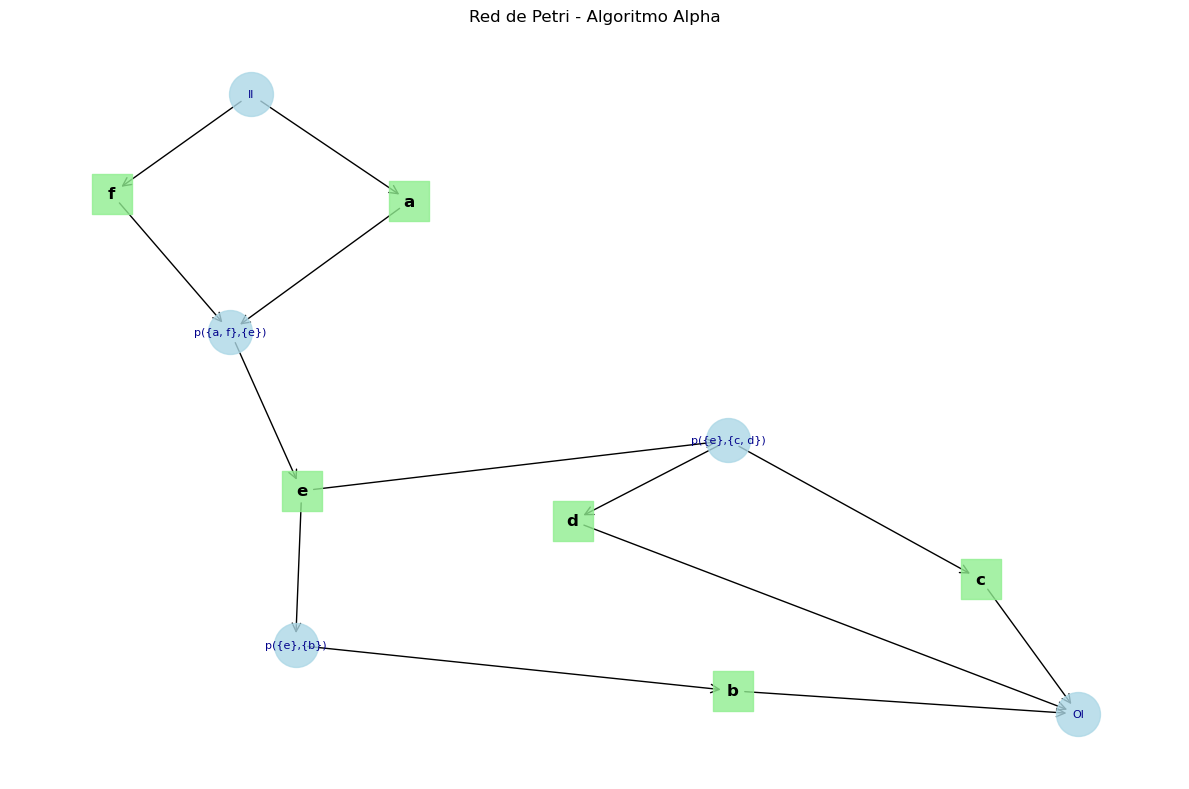


Ejecutado correctamente

--------------------------------------------------


In [14]:
log6 = "[<a,f,e,d,b>,<f,a,e,d,b>,<a,f,e,c,b>,<a,f,e,b,d>,<a,f,e,b,c>,<f,a,e,c,b>]"
ejecutar_alpha("L6", log6)

## Análisis del Log 7
Este log presenta un proceso bastante complejo con rutas largas y algunos bucles.


=== ANÁLISIS DEL LOG L7 ===

Log: [<A,B,C,D,E,F,B,D,C,E,G>,<A,B,D,C,E,G>,<A,B,C,D,E,F,B,C,D,E,F,B,D,C,E,G>]

Actividades: ['A', 'B', 'C', 'D', 'E', 'F', 'G']
Tareas iniciales: ['A']
Tareas finales: ['G']

Matriz de huella:
    A   B   C   D   E   F   G
A   #  ->   #   #   #   #   #
B  <-   #  ->  ->   #  <-   #
C   #  <-   #  ||  ->   #   #
D   #  <-  ||   #  ->   #   #
E   #   #  <-  <-   #  ->  ->
F   #  ->   #   #  <-   #   #
G   #   #   #   #  <-   #   #

Lugares identificados:
p0: {B} → {C, D}
p1: {E} → {F, G}
p2: {A, F} → {B}
p3: {C, D} → {E}
p4: {Il} → {A}
p5: {G} → {Ol}

Visualización de la Red de Petri:


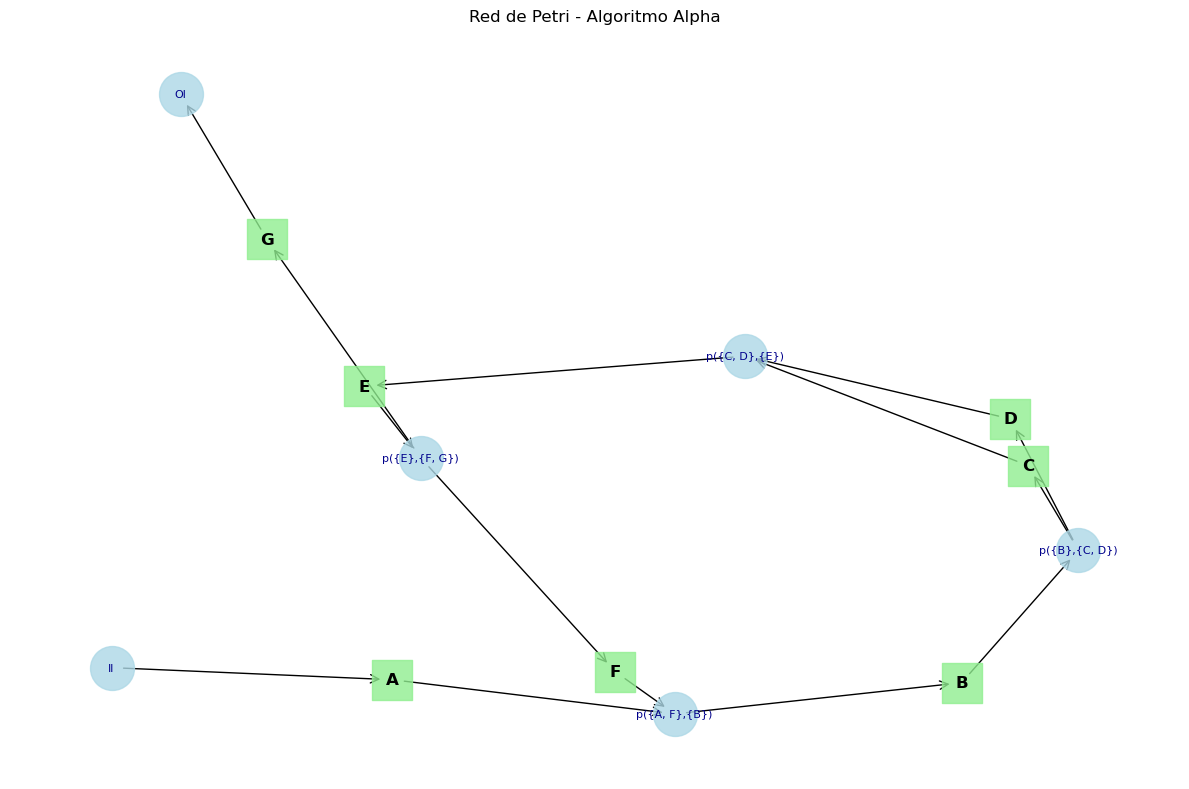


Ejecutado correctamente

--------------------------------------------------


In [15]:
log7 = "[<A,B,C,D,E,F,B,D,C,E,G>,<A,B,D,C,E,G>,<A,B,C,D,E,F,B,C,D,E,F,B,D,C,E,G>]"
ejecutar_alpha("L7", log7)

## Análisis del Log 8
Este log tiene un comportamiento interesante con lazos anidados.


=== ANÁLISIS DEL LOG L8 ===

Log: [<a,b,c,d>,<a,c,b,d>,<a,b,c,e,f,c,b,d>,<a,b,c,e,f,b,c,d>,<a,c,b,e,f,b,c,d>,<a,c,b,e,f,b,c,e,f,c,b,d>]

Actividades: ['a', 'b', 'c', 'd', 'e', 'f']
Tareas iniciales: ['a']
Tareas finales: ['d']

Matriz de huella:
    a   b   c   d   e   f
a   #  ->  ->   #   #   #
b  <-   #  ||  ->  ->  <-
c  <-  ||   #  ->  ->  <-
d   #  <-  <-   #   #   #
e   #  <-  <-   #   #  ->
f   #  ->  ->   #  <-   #

Lugares identificados:
p0: {e} → {f}
p1: {b} → {d, e}
p2: {c} → {d, e}
p3: {a, f} → {b}
p4: {a, f} → {c}
p5: {Il} → {a}
p6: {d} → {Ol}

Visualización de la Red de Petri:


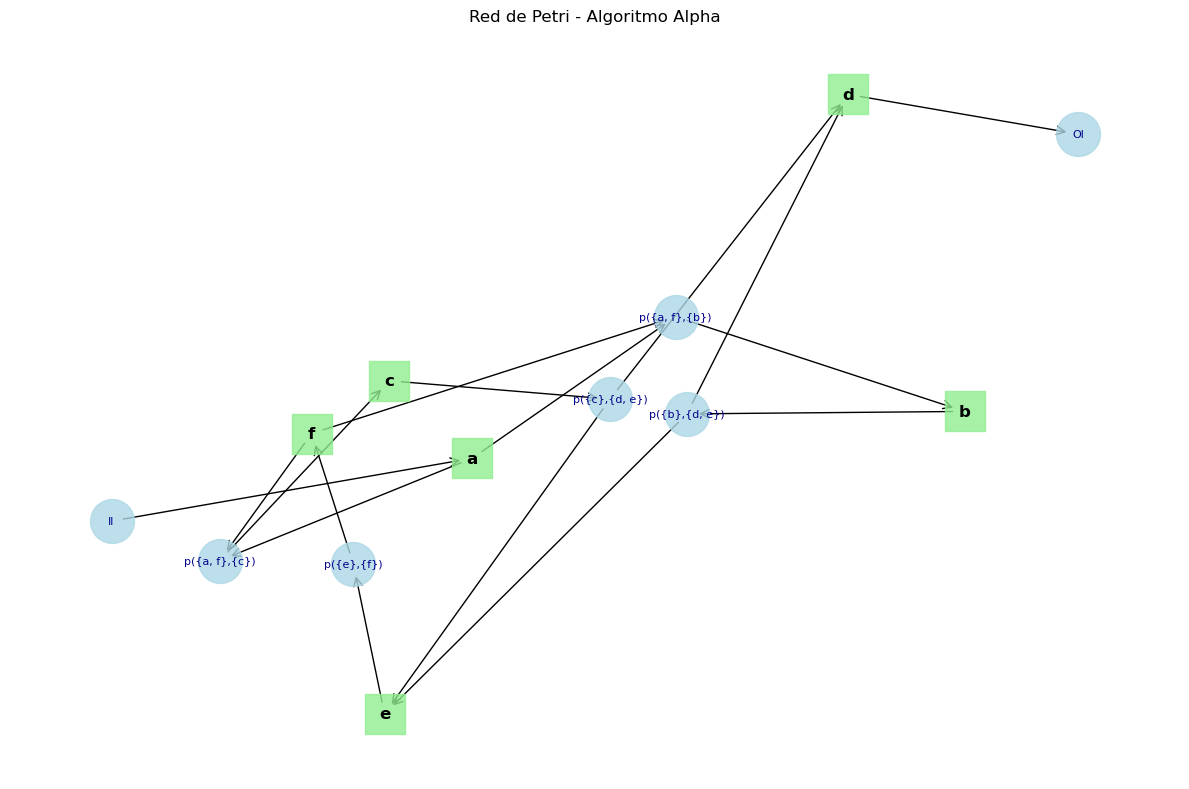


Ejecutado correctamente

--------------------------------------------------


In [16]:
log8 = "[<a,b,c,d>,<a,c,b,d>,<a,b,c,e,f,c,b,d>,<a,b,c,e,f,b,c,d>,<a,c,b,e,f,b,c,d>,<a,c,b,e,f,b,c,e,f,c,b,d>]"
ejecutar_alpha("L8", log8)

## Análisis del Log 9
Este log muestra un patrón complejo con múltiples entradas y salidas paralelas.


=== ANÁLISIS DEL LOG L9 ===

Log: [<a,b,e,f>,<a,b,e,c,d,b,f>,<a,b,c,e,d,b,f>,<a,b,c,d,e,b,f>,<a,e,b,c,d,b,f>]

Actividades: ['a', 'b', 'c', 'd', 'e', 'f']
Tareas iniciales: ['a']
Tareas finales: ['f']

Matriz de huella:
    a   b   c   d   e   f
a   #  ->   #   #  ->   #
b  <-   #  ->  <-  ||  ->
c   #  <-   #  ->  ||   #
d   #  ->  <-   #  ||   #
e  <-  ||  ||  ||   #  ->
f   #  <-   #   #  <-   #

Lugares identificados:
p0: {c} → {d}
p1: {e} → {f}
p2: {a} → {e}
p3: {b} → {c, f}
p4: {a, d} → {b}
p5: {Il} → {a}
p6: {f} → {Ol}

Visualización de la Red de Petri:


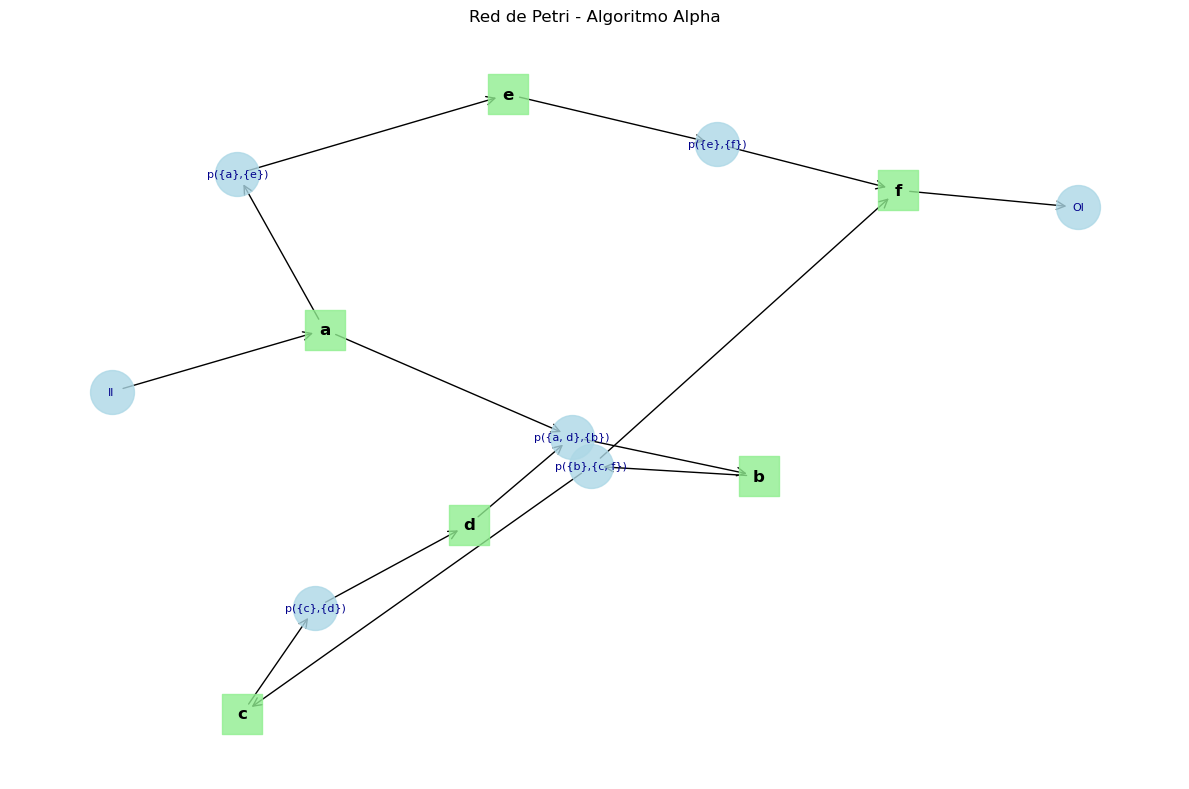


Ejecutado correctamente

--------------------------------------------------


In [17]:
log9 = "[<a,b,e,f>,<a,b,e,c,d,b,f>,<a,b,c,e,d,b,f>,<a,b,c,d,e,b,f>,<a,e,b,c,d,b,f>]"
ejecutar_alpha("L9", log9)

## Comparación de resultados

Ahora podemos comparar los resultados de los diferentes logs para analizar cómo el algoritmo Alpha maneja diferentes estructuras de proceso.

In [18]:
# Código para comparar características clave entre logs
logs = [
    ("Log 1", log1),
    ("Log 2", log2),
    ("Log 3", log3),
    ("Log 4", log4),
    ("Log 5", log5),
    ("Log 6", log6),
    ("Log 7", log7),
    ("Log 8", log8),
    ("Log 9", log9)
]

import pandas as pd

# Crear una tabla comparativa
datos_comparacion = []

for nombre, log in logs:
    try:
        # Procesar el log
        alpha = Alpha().parse_event_log(log).discover_relations().execute_alpha_algorithm()
        
        # Recopilar estadísticas
        datos_comparacion.append({
            "Log": nombre,
            "Actividades": len(alpha.activity_set),
            "Causalidad": len(alpha.causal_relations),
            "Paralelismo": len(alpha.concurrent_relations),
            "Decisión": len(alpha.choice_relations),
            "Lugares": len(alpha.places),
            "Flujos": len(alpha.flow_relations)
        })
    except Exception as e:
        datos_comparacion.append({
            "Log": nombre,
            "Actividades": "Error",
            "Causalidad": "Error",
            "Paralelismo": "Error",
            "Decisión": "Error",
            "Lugares": "Error",
            "Flujos": "Error"
        })
        print(f"Error al procesar {nombre}: {e}")

# Crear y mostrar el DataFrame
df_comparacion = pd.DataFrame(datos_comparacion)
df_comparacion

,Log,Actividades,Causalidad,Paralelismo,Decisión,Lugares,Flujos
0,Log 1,5,6,2,11,6,14
1,Log 2,6,6,2,22,5,12
2,Log 3,4,4,0,8,4,8
3,Log 4,5,5,0,15,5,12
4,Log 5,3,2,2,3,4,6
5,Log 6,6,5,6,20,5,13
6,Log 7,7,8,2,31,6,14
7,Log 8,6,9,2,16,7,16
8,Log 9,6,7,6,16,7,14


## Conclusiones

Después de analizar los diferentes logs de eventos con el algoritmo Alpha, podemos observar:

1. El algoritmo funciona bien con patrones simples de flujo y elección.
2. Los logs con paralelismo son correctamente detectados y representados.
3. Los bucles representan un desafío para el algoritmo Alpha básico.
4. Los patrones complejos con múltiples entradas y salidas son manejados con diferentes grados de precisión.

Este ejercicio demuestra las capacidades y limitaciones del algoritmo Alpha como una técnica fundamental de minería de procesos.